# 3. Feature Engineering 

**Jordan Miranda**

**Course: BrainStation Data Science**

**Previous Notebook: 2. Initial EDA**

**Next Notebook: 4. Modelling**

In this notebook we're going to load in the original cleaned dataset from notebook ***1. Preprocessing & Cleaning***. Our goal in this notebook is to engineer new features that can compare our players on *relative* terms (`_p90`s for example) rather than *absolute* terms (`Goals` & `Ast` for example). The goal in creating these relative metrics is to compare how our players perform on an equal, relative playing field. 

It's no surprise when a player (A) who starts week-in week-out scores more goals than a player (B) who may play only a few games a season. What we're trying to learn with our clustering is whether or not these players (A & B) perform at the same level given the situations they're in. This would allow clubs to ideally identify player B as a player with potential and sign them for below market price based on his performance metrics relative to his situation. This is why we are creating new *relative* metrics to judge our players on. 

Let's get started on our feature engineering. We'll need to import our usual toolbox and then read in our dataset to begin.

In [1]:
# reading in the usual toolbox of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

In [2]:
# reading in our csv from book 1, setting our index_col to the one provided in the dataset
stats_df2 = pd.read_csv("FormattedCapstoneData/stats_df2.csv", index_col=[0])
stats_df2

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
0,Fernando-Menegazzo,MF,Bordeaux,2010,Ligue 1,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09
1,Sergio-Abad-Beyxer,MF,Levante,2010,La Liga,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2,Ignazio-Abate,DFMF,Milan,2010,Serie A,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04
3,Mohammed-Abdellaoue,FW,Hannover 96,2010,Bundesliga,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47
4,Yacine-Abdessadki,MF,Freiburg,2010,Bundesliga,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,Steven-Zuber,DFMF,Eint Frankfurt,2020,Bundesliga,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46
27670,Martin-Zubimendi,MF,Real Sociedad,2020,La Liga,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00
27671,Martin-Odegaard,MF,Arsenal,2020,Premier League,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31
27672,Martin-Odegaard,MFFW,Real Madrid,2020,La Liga,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00


# Non-Numeric Columns

There are 4 columns that are not currently numerical values. Those columns are listed below.

In [3]:
stats_df2.select_dtypes("object").columns

Index(['Player_Name', 'Pos', 'Squad', 'League'], dtype='object')

The first two that can be dealt with quickly are `League` and `Pos` as they will only contain a small number of unique values and can then be one hot encoded. Those columns will be taken care of now.

### League

The first non-numeric column we want to address is the league in which the player plays in. This can be a useful column to keep around for the following reason: 

If teams are looking for a similar player, having one play in the same league can be a positive as the player is acclimated to the league's playstyle / their lifestyle in the league's country. Often times player's switching leagues have a hard time adjusting to the new league's brand of football and football clubs fail to integrate the player successfully to the club / new country. This results in a dip in performance that can become permanent. 

Since there are only 5 leagues in our dataset, we can OneHotEncode this column.

In [4]:
# importing our OHE from sklearn
from sklearn.preprocessing import OneHotEncoder

# instantiate encoder
ohe = OneHotEncoder()

# 2d array required so store as dataframe
league = pd.DataFrame(stats_df2["League"])

# fit and transform data
encoded = ohe.fit_transform(league)

# interpret 
encoded

<27674x5 sparse matrix of type '<class 'numpy.float64'>'
	with 27674 stored elements in Compressed Sparse Row format>

We've OneHotEncoded each of our leagues into a sparse matrix. Let's turn it into a dense array then we'll build a DataFrame from it with the name of the columns as well.

In [5]:
# convert from sparse to dense
dense_league = encoded.toarray()
dense_league

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [6]:
ohe.categories_

[array(['Bundesliga', 'La Liga', 'Ligue 1', 'Premier League', 'Serie A'],
       dtype=object)]

We've turned our sparse matrix into a dense array and we've retrieved the column names from our One Hot Encoder. We can now combine these to create our dummy variable dataframe for the `League` column.

In [7]:
# put into a df to get column names
league_df = pd.DataFrame(dense_league, columns=["Bundesliga", "La Liga", "Ligue 1", "Premier League", "Serie A"], dtype=int)

# show 
league_df.head()

,Bundesliga,La Liga,Ligue 1,Premier League,Serie A
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0


We've assembled our `League` dummy variable dataframe, let's do a quick with our original dataset to ensure the values match.

In [8]:
# check that it worked
stats_df2["League"].head()
# looks good!

0       Ligue 1
1       La Liga
2       Serie A
3    Bundesliga
4    Bundesliga
Name: League, dtype: object

We'll need to drop one column as a reference column and to prevent multicollinearity. Since the Premier League is the most well known league in the world we will use this column as our reference. If the player is not found in one of the other four leagues, we know they're in the English Premier League.

In [9]:
# dropping the reference column
league_df.drop(columns="Premier League", inplace=True)

In [10]:
# check that it worked - looks good
league_df.head()

,Bundesliga,La Liga,Ligue 1,Serie A
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [11]:
# check to make sure no rows were dropped
league_df.shape[0] == stats_df2.shape[0]

True

We've built our first DataFrame for the OHE `League` column. Now we can move on to our next non-numeric column.

### Player Position

In [12]:
# find out how many positions we have currently
stats_df2["Pos"].value_counts()

DF      8008
MF      7033
FW      3934
FWMF    3868
DFMF    2546
MFFW    1451
MFDF     432
DFFW     316
FWDF      86
Name: Pos, dtype: int64

From the cell above we see that currently in our dataset there are 8 positions. 5 of them are combinations of the three main ones we want to keep:
- DF (Defender)
- MF (Midfielder)
- FW (Forward)

We'll consolidate all the other combinations into the above three categories.

Looking at our value counts from above, we see a lot of combinations with `MF`. Since a midfielder is a versatile position and can occupy many roles on the field, we'll take any positions that contain the string "MF" and assign it as `MF`.

In [13]:
# searching for any player whos position contains the letter M in their `Pos` field.
# then we're assigning their position as "MF" for midfield
stats_df2.loc[stats_df2["Pos"].str.contains("M"), "Pos"] = "MF"

In [14]:
# check that it worked
stats_df2["Pos"].value_counts()

MF      15330
DF       8008
FW       3934
DFFW      316
FWDF       86
Name: Pos, dtype: int64

Now that we've dealt with our midfielders, let's deal with the remaining two non-essential values - `DFFW` and `FWDF`. It is almost an unheard of occurence that a forward (`FW`) would ever be fielded as a defender (it's a much different skillset). However, in certain conditions there are cases where defenders (`DF`) can be fielded as a `FW` (in the position of a wing-back for example). Normally these players would be a defensive position but occupy both a `FW` and `DF` role in these special cases. Since this is likely the case, we'll consolidate these final two non-core values into the `DF` category.

In [15]:
# searching for any player whos position contained the letter D (defense) in their `Pos` column
# and assigning them the position DF for defender
stats_df2.loc[stats_df2["Pos"].str.contains("D"), "Pos"] = "DF"

In [16]:
# check that it worked
stats_df2["Pos"].value_counts()

MF    15330
DF     8410
FW     3934
Name: Pos, dtype: int64

Our `Pos` column has been consolidated down to only contain 3 unique values - `DF`, `MF`, `FW`. We can now perform OneHotEncoding to turn this categorical column into a numerical one.

In [17]:
# instantiate encoder
ohe = OneHotEncoder()

# 2d array to store as df
position = pd.DataFrame(stats_df2["Pos"])

# fit and transform data
encoded = ohe.fit_transform(position)

# interpret
encoded

<27674x3 sparse matrix of type '<class 'numpy.float64'>'
	with 27674 stored elements in Compressed Sparse Row format>

We've now turned our positions into One Hot Encoded columns however they are currently stored in a sparse matrix. We'll need to convert our sparse matrix into a dense array and attach our OHE categories to create a DataFrame for our dummy encodings.

In [18]:
# convert from sparse to dense
dense_position = encoded.toarray()
dense_position

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [19]:
ohe.categories_

[array(['DF', 'FW', 'MF'], dtype=object)]

We've turned our sparse matrix into a dense array and we've retrieved the column names from our One Hot Encoder. We can now combine these to create our dummy variable dataframe for the `Pos` column.

In [20]:
# put into df to get column names
position_df = pd.DataFrame(dense_position, columns=["Pos_DF", "Pos_FW", "Pos_MF"], dtype=int)

# show
position_df.head()

,Pos_DF,Pos_FW,Pos_MF
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


We've converted our OHE sparse matrix into a DataFrame with our consolidated positions as the column titles.

Before we can move on we need to drop one column to act as our reference column. Since most of the features in this dataset are attacking-based metrics and our focus for this analysis is on attack-centric players, we'll drop the defenders column.

In [21]:
# dropping the defender position column
position_df.drop(columns="Pos_DF", inplace=True)

Now that we've dropped our reference column let's check against our original `Pos` column to make sure the values align and the shapes of the dataframes are the same.

In [22]:
position_df.head(10)

,Pos_FW,Pos_MF
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
6,0,0
7,0,1
8,0,0
9,0,0


In [23]:
# check values align - looks good
stats_df2["Pos"].head(10)

0    MF
1    MF
2    MF
3    FW
4    MF
5    MF
6    DF
7    MF
8    DF
9    DF
Name: Pos, dtype: object

In [24]:
# row shape check - looks good
position_df.shape[0] == stats_df2["Pos"].shape[0]

True

We've now dealt with our `Pos` and `League` columns, let's look at `Squad` next.

### Squad

Similar to the Nationality of the player, the Squad the player currently plays in is not important when it comes to the analysis of their skills so we'll be dropping this column. What was more important was the `League` they played in as that could potentially have an impact on their ability. The team they play for will not impact their ability on a more granular, individual player basis. 

As we already dealt with the `League` column and for the reasons mentioned above, we'll drop this column.

In [25]:
# dropping Squad (Team) from the dataset
stats_df2.drop(columns="Squad", inplace=True)

In [26]:
# check it worked
stats_df2.head()

,Player_Name,Pos,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
0,Fernando-Menegazzo,MF,2010,Ligue 1,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09
1,Sergio-Abad-Beyxer,MF,2010,La Liga,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2,Ignazio-Abate,MF,2010,Serie A,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04
3,Mohammed-Abdellaoue,FW,2010,Bundesliga,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47
4,Yacine-Abdessadki,MF,2010,Bundesliga,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00


Let's refresh ourselves on what columns we have to convert from categorical to numerical still.

In [27]:
# check our to-convert list
stats_df2.select_dtypes("object").columns

Index(['Player_Name', 'Pos', 'League'], dtype='object')

We know we've dealt with `Pos` and `League` as we OneHotEncoded these columns however we haven't dropped them from our original DataFrame just yet (we will drop them after concatenating our OHE columns). This leaves us with our final categorical column - `Player_Name`.

### Player_Name

In [28]:
stats_df2["Player_Name"].nunique()

7968

We won't be converting our Player Name into a numerical column as we will be using `.groupby()` on this column to aggregate our players over all the years they've played.

## Merging OHE Columns with Main DataFrame

Let's concatenate our two `Pos` and `League` DataFrames now so we can include them our main DataFrames.

In [29]:
# concatenate our main df and the OHE dfs into one
stats_df2_ohe = pd.concat([stats_df2, position_df, league_df], axis=1)

In [30]:
# sanity check
stats_df2_ohe.head()

,Player_Name,Pos,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A
0,Fernando-Menegazzo,MF,2010,Ligue 1,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,0,1,0,0,1,0
1,Sergio-Abad-Beyxer,MF,2010,La Liga,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0
2,Ignazio-Abate,MF,2010,Serie A,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,0,1,0,0,0,1
3,Mohammed-Abdellaoue,FW,2010,Bundesliga,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,1,0,1,0,0,0
4,Yacine-Abdessadki,MF,2010,Bundesliga,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0


Now that we've successfully merged our OHE columns with our main dataset, let's go ahead and drop the original `object` type columns that we converted - `Pos` and `League`.

In [31]:
# drop our initial categorical columns
stats_df2_ohe.drop(columns=["Pos", "League"], inplace=True)

In [32]:
# sanity check part 2
stats_df2_ohe.head()

,Player_Name,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A
0,Fernando-Menegazzo,2010,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,0,1,0,0,1,0
1,Sergio-Abad-Beyxer,2010,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0
2,Ignazio-Abate,2010,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,0,1,0,0,0,1
3,Mohammed-Abdellaoue,2010,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,1,0,1,0,0,0
4,Yacine-Abdessadki,2010,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0


# Numeric Columns

To have players on similar levels, we need to create metrics that can compare players equally regardless of how many games they've played. If a Forward plays more games, they're more likely to score more goals. In our dataset we have metrics such as `Gls_p90` that fairly measure each player's scoring ability on a game-by-game basis rather than their absolute contribution over a season. This way, players who only play 4-5 games a season can still have their contributions compared relative to those who play 20+ games a season.

Since there are a few columns already containing `p90` metrics, we will create a few more like these to further level the stat-line playing field.

### Start Frequency

This numerical column will measure how often a player starts in all the games they play. Starting a game is often a sign of a strong player or one who has the potential to grow and is being given chances by the coaching staff. By measuring how often a player starts in the matches they play, it can help determine if the player is still in need of playing time to refine their skills (if they don't start much) or if the player is already on their way to becoming a great player (high starting frequency).

To create this metric, we will take the `Starts` column and divide it by the `MP` or `Matches Played` column. This will give us the player's starting frequency.

In [33]:
# creating our Starting Frequency column = Starts / MP 
stats_df2_ohe["Start_Freq"] = stats_df2_ohe["Starts"] / stats_df2_ohe["MP"]

In [34]:
# check it worked
stats_df2_ohe.head()

,Player_Name,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq
0,Fernando-Menegazzo,2010,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,0,1,0,0,1,0,0.971429
1,Sergio-Abad-Beyxer,2010,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.000000
2,Ignazio-Abate,2010,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,0,1,0,0,0,1,0.896552
3,Mohammed-Abdellaoue,2010,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,1,0,1,0,0,0,1.000000
4,Yacine-Abdessadki,2010,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0,0.952381


Let's check the distribution of our newly created metric.

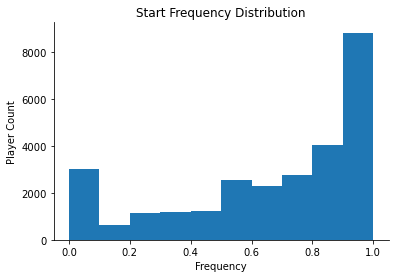

In [44]:
plt.figure()
plt.hist(stats_df2_ohe["Start_Freq"])

# labels, title, cleaning
plt.title("Start Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Player Count")
sns.despine()

plt.show()

We can see a majority of players fall into a `Start_Freq` of one, it wouldn't surprise me if a significant portion of these players played one or two matches in their season and happened to start both of their games, giving them a `Start_Freq` of 1. While this would be cause for concern if we were judging players on a season-by-season basis, since we are planning to `.groupby()` the `Player_Name` category, their `Start_Freq` will likely get averaged down as they would play a similar amount of games but start less matches due to their poor performances. We'll check the distribution of our numerical feature engineered columns post-`.groupby()` to see if we were correct on our assumption.

### Avg_Mins_pGame

The second metric we will create is Average Minutes per Game. Similar to the `Start_Freq` column, `Avg_Mins_pGame` will tell us how long the player is playing for on average, when they do play. Players that have a high `Avg_Mins_pGame` would signal that they are "complete" players - strong players who can start and finish a game due to a variety of factors: fitness level, lack of injuries, and skill level, to name a few.

Typically, younger players who still haven't fully developed their skills will be substituted into the game for the last 5-10 minutes as the game comes to a close. By creating this metric, we will be able to identify these players as their `Avg_Mins_pGame` would be quite low, signalling that they're still in need of development and backing.

Conversely, players who have a high `Avg_Mins_pGame` would be of value to teams that are looking to compete for trophies as they don't have the time and/or patience to put their faith in a player who hasn't developed their skills yet. Therefore, they would look for players with a high `Avg_Mins_pGame` and do more investigating on their other metrics to see if they're worth bringing in to their club.

To create our `Avg_Mins_pGame` metric, we will divide the `Min` column by the `MP` or `Matches Played` column.

In [36]:
# creating our new avg mins p game column by taking the mins played `Min` and dividing it by the matches played `MP`
stats_df2_ohe["Avg_Mins_pGame"] = stats_df2_ohe["Min"] / stats_df2_ohe["MP"]
# check that it worked
stats_df2_ohe.head()

,Player_Name,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame
0,Fernando-Menegazzo,2010,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,0,1,0,0,1,0,0.971429,84.142857
1,Sergio-Abad-Beyxer,2010,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.000000,5.000000
2,Ignazio-Abate,2010,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,0,1,0,0,0,1,0.896552,83.172414
3,Mohammed-Abdellaoue,2010,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,1,0,1,0,0,0,1.000000,80.230769
4,Yacine-Abdessadki,2010,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0,0.952381,83.476190


Once again, let's check the distribution of our new metric.

In [37]:
# doing a describe as well
stats_df2_ohe["Avg_Mins_pGame"].describe()

count    27674.000000
mean        60.769524
std         23.931968
min          1.000000
25%         44.960385
50%         67.039231
75%         80.891865
max         92.677419
Name: Avg_Mins_pGame, dtype: float64

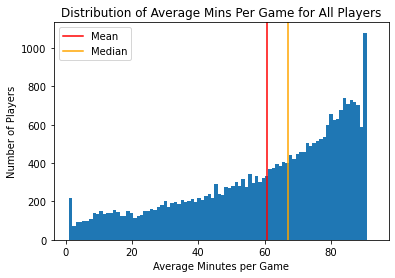

In [46]:
plt.figure()
plt.hist(stats_df2_ohe["Avg_Mins_pGame"], bins=90)

# lines
plt.axvline(stats_df2_ohe["Avg_Mins_pGame"].mean(), color="red", label="Mean")
plt.axvline(stats_df2_ohe["Avg_Mins_pGame"].median(), color="orange", label="Median")
# labels
plt.legend()
plt.title("Distribution of Average Mins Per Game for All Players")
plt.xlabel("Average Minutes per Game")
plt.ylabel("Number of Players")
plt.show()

Our new metric's distribution shows us that player count steadily rises as the Average Minutes per Game increases. A fair share of players are playing entire games. This is to be expected as only 3 players can be substituted per game, meaning the remaining 8 players will always play a full 90 minutes. Overall, the distribution of this feature seems expected in the context of the sport.

### Min_to_Age Ratio

Similar to `Start_Freq`, we'll create a `Mins_to_Age` ratio that tells us how many minutes a player is getting at their Age. If the player is quite young and they're receiving a lot of minutes, that is a strong sign for any club looking to purchase an upcoming star. Conversely, if a player's age is high and their minutes played is low, this metric would tell us that the player is no longer in their prime and might not be worth taking a look at.

To create this metric, we'll take a player's `Mins` and divide it by their `Age`.

In [39]:
# creating metric by diviing player's Minutes by their Age
stats_df2_ohe["Mins_to_Age"] = stats_df2_ohe["Min"] / stats_df2_ohe["Age"]
# check that it worked
stats_df2_ohe

,Player_Name,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age
0,Fernando-Menegazzo,2010,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,0,1,0,0,1,0,0.971429,84.142857,101.551724
1,Sergio-Abad-Beyxer,2010,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.000000,5.000000,0.238095
2,Ignazio-Abate,2010,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,0,1,0,0,0,1,0.896552,83.172414,104.869565
3,Mohammed-Abdellaoue,2010,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,1,0,1,0,0,0,1.000000,80.230769,86.916667
4,Yacine-Abdessadki,2010,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0,0.952381,83.476190,60.448276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,Steven-Zuber,2020,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46,0,1,1,0,0,0,0.300000,29.250000,20.892857
27670,Martin-Zubimendi,2020,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.548387,60.709677,89.619048
27671,Martin-Odegaard,2020,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31,0,1,0,0,0,0,0.642857,61.857143,41.238095
27672,Martin-Odegaard,2020,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.428571,33.428571,11.142857


Once again, we'll want to check the distribution for our column to see if it makes sense intuitive sense and will help our model.

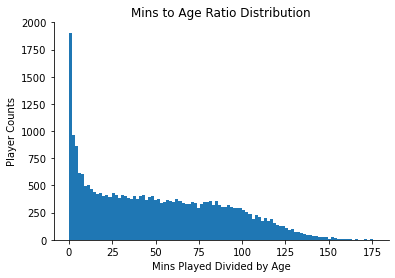

In [52]:
plt.figure()
plt.hist(stats_df2_ohe["Mins_to_Age"], bins=100)

# labels, and cleaning
plt.title("Mins to Age Ratio Distribution")
plt.xlabel("Mins Played Divided by Age")
plt.ylabel("Player Counts")
sns.despine()
plt.show()

The distribution here makes intuitive sense in the context of soccer once again. Most players who are quite young see only a few minutes on the field a season (10-20 minutes) so it's no surprise we see a large amount of players at the 0-1 values as their `Mins_to_Age` value would be somewhere between 0 and 1 (if they're between 16-20 for our example). 

After we pass this initial spike the distribution quickly levels out and only begins to taper off towards the extreme values. This is also expected as players who are quite young that receive large amounts of playing time are very rare and have to possess extreme talent in order to be awarded with such high playing minutes, this would further increase given their young age being the denominator in our `Mins_to_Age` feature.

### PK Conversion Rate

This is a rather straight forward metric. For players who take penalties we want to see what their conversion percentage is. If they have a high percentage, that means they do (or *should*) take penalties as they more frequently lead to goals.

To create this metric we'll simply take `PK` and divide it by `PKatt`.

In [40]:
# creating our new conversion metric by dividing penalty goals by the number of penalties attempted
stats_df2_ohe["PKConvPct"] = stats_df2_ohe["PK"] / stats_df2_ohe["PKatt"]
# sanity check
stats_df2_ohe

,Player_Name,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct
0,Fernando-Menegazzo,2010,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,0,1,0,0,1,0,0.971429,84.142857,101.551724,NaN
1,Sergio-Abad-Beyxer,2010,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.000000,5.000000,0.238095,NaN
2,Ignazio-Abate,2010,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,0,1,0,0,0,1,0.896552,83.172414,104.869565,NaN
3,Mohammed-Abdellaoue,2010,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,1,0,1,0,0,0,1.000000,80.230769,86.916667,NaN
4,Yacine-Abdessadki,2010,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0,0.952381,83.476190,60.448276,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,Steven-Zuber,2020,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46,0,1,1,0,0,0,0.300000,29.250000,20.892857,NaN
27670,Martin-Zubimendi,2020,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.548387,60.709677,89.619048,NaN
27671,Martin-Odegaard,2020,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31,0,1,0,0,0,0,0.642857,61.857143,41.238095,NaN
27672,Martin-Odegaard,2020,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.428571,33.428571,11.142857,NaN


As we've done for all our metrics thus far, let's check the distribution.

ValueError: supplied range of [0.0, inf] is not finite

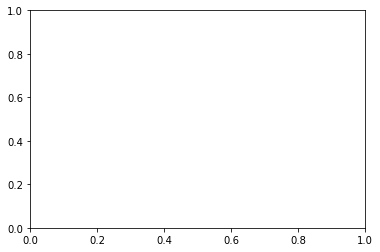

In [41]:
plt.figure()
plt.hist(stats_df2_ohe["PKConvPct"])
plt.title("PK Conversion Percentages Across All Players")
plt.xlabel("Conversion Percentage")
plt.ylabel("Player Count")
plt.show()

Interesting, we get an error when we try to plot this value due to a max value of `infinite`. Let's take a second look using `.describe()`. 

In [53]:
stats_df2_ohe["PKConvPct"].describe()

count    2664.0
mean        inf
std         NaN
min         0.0
25%         0.5
50%         1.0
75%         1.0
max         inf
Name: PKConvPct, dtype: float64

Confirming what the error above gave us, we've got a player with an infinite `PKConvPct` value. We'll have to take a closer look at this but we'll wait until after we've finished creating new numerical features and joined all our individual player's season using `.groupby()`.

### Assist Frequency in Goal Contribution per 90

The final numeric feature we will engineer is the frequency a player assists in their goal contributions. This metric will measure whether a player is more likely to assist or score when they do contribute in a goal for their team. If this metric's value is closer to 1, then the player is often assisting in his team's goals rather than scoring them. Conversely, if a player's value is closer to 0, they're more likely to be the one scoring the goal. This well help to better identify players that can be considered "playmakers" versus players that can be considered "finishers".

To create this metric that is unbiased towards how many games a player plays, we'll use the `p90` columns for calculating our metrics.

The formula for the column will be as follows `Ast_p90` / `G+A_p90`.

In [54]:
# ast frequency p 90 will be their asts p90 divided by their total contributions p90 (goals and assists)
stats_df2_ohe["Ast_Freq_in_Gl_Contribution_p90"] = stats_df2_ohe["Ast_p90"] / stats_df2_ohe["G+A_p90"]
# sanity check
stats_df2_ohe

,Player_Name,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
0,Fernando-Menegazzo,2010,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,0,1,0,0,1,0,0.971429,84.142857,101.551724,NaN,0.333333
1,Sergio-Abad-Beyxer,2010,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.000000,5.000000,0.238095,NaN,NaN
2,Ignazio-Abate,2010,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,0,1,0,0,0,1,0.896552,83.172414,104.869565,NaN,1.000000
3,Mohammed-Abdellaoue,2010,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,1,0,1,0,0,0,1.000000,80.230769,86.916667,NaN,0.085106
4,Yacine-Abdessadki,2010,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0,0.952381,83.476190,60.448276,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,Steven-Zuber,2020,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46,0,1,1,0,0,0,0.300000,29.250000,20.892857,NaN,1.000000
27670,Martin-Zubimendi,2020,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.548387,60.709677,89.619048,NaN,NaN
27671,Martin-Odegaard,2020,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31,0,1,0,0,0,0,0.642857,61.857143,41.238095,NaN,0.677419
27672,Martin-Odegaard,2020,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.428571,33.428571,11.142857,NaN,NaN


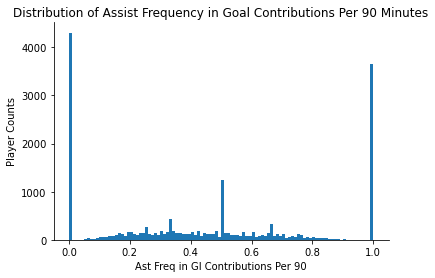

In [80]:
plt.figure()
plt.hist(stats_df2_ohe["Ast_Freq_in_Gl_Contribution_p90"], bins=100)

# labels, and cleaning
plt.title("Distribution of Assist Frequency in Goal Contributions Per 90 Minutes")
plt.xlabel("Ast Freq in Gl Contributions Per 90")
plt.ylabel("Player Counts")
sns.despine()
plt.show()

We can see that a large majority of our values currently reside in the 0, 0.5, or 1 values. This is likely due to players with only 1 goal or assist and because of this our feature's value becomes a 1, 0, or even 0.5 (if they have 1 assist and 1 goal) as well. Unfortunately, this is just a limitation of our feature. However, through our `.groupby()` it's possible that we see the distribution of this metric change significantly as over the course of multiple seasons its highly unlikely a player will follow this pattern we observed above.

Now that we've engineered new numerical features and investigated their distributions, let's look for any null values with these features. This will be one of our last steps to prepare our dataset for our clustering models.

## Null Values in Feature Engineered Columns

As some of our newly created features used division, there were many instances where we divided zero by zero, creating `NaN` values in columns where players didn't have a non-zero value in them. We're now going to check what percent of the column's value in the dataset are null. 

However, as our plan is to use `.groupby()` to group the player's together by their name, we won't fill in the `NaN` values until after we've grouped them. By grouping we also have the possibility that we can reduce the number of `NaN`s seen in the dataset.

In [55]:
# displaying the percentage of NaN values in each column
(stats_df2_ohe.isna().sum(axis=0)/stats_df2_ohe.shape[0]) * 100 

Player_Name                         0.000000
Year                                0.000000
Age                                 0.000000
Born                                0.000000
MP                                  0.000000
Starts                              0.000000
Min                                 0.000000
Gls                                 0.000000
Ast                                 0.000000
G-PK                                0.000000
PK                                  0.000000
PKatt                               0.000000
CrdY                                0.000000
CrdR                                0.000000
Gls_p90                             0.000000
Ast_p90                             0.000000
G+A_p90                             0.000000
G-PK_p90                            0.000000
G+A-PK_p90                          0.000000
Pos_FW                              0.000000
Pos_MF                              0.000000
Bundesliga                          0.000000
La Liga   

We can see that for the `PKConvPct`, 90% of the rows are missing values. For our `Ast_Freq_in_Gl_Contribution_p90`, 35% of the rows are missing values. As mentioned above, we'll hold off on filling the `NaN` values until after our `.groupby()` on the `Player_Name` column to see if there's a reduction in the null values.

## Grouping by Player Name 

We're now going to reduce the number of rows in our dataset by using `.groupby()` on the `Player_Name` column. Since our dataset has 10 years of data, the same player could show up multiple times with similar metrics to a prior year. As the goal of our clustering is to group players with similar statlines, we don't want our model to group the same player but from a different year! By grouping by the player's name we can aggregate their stats over the course of their entire career.

Before we perform the `.groupby()`, let's save our finalized OneHotEncoded DataFrame.

In [57]:
# creating a copy of our finalized OHE 
stats_df3 = stats_df2_ohe.copy()
stats_df3

,Player_Name,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
0,Fernando-Menegazzo,2010,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,0,1,0,0,1,0,0.971429,84.142857,101.551724,NaN,0.333333
1,Sergio-Abad-Beyxer,2010,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.000000,5.000000,0.238095,NaN,NaN
2,Ignazio-Abate,2010,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,0,1,0,0,0,1,0.896552,83.172414,104.869565,NaN,1.000000
3,Mohammed-Abdellaoue,2010,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,1,0,1,0,0,0,1.000000,80.230769,86.916667,NaN,0.085106
4,Yacine-Abdessadki,2010,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0,0.952381,83.476190,60.448276,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,Steven-Zuber,2020,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46,0,1,1,0,0,0,0.300000,29.250000,20.892857,NaN,1.000000
27670,Martin-Zubimendi,2020,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.548387,60.709677,89.619048,NaN,NaN
27671,Martin-Odegaard,2020,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31,0,1,0,0,0,0,0.642857,61.857143,41.238095,NaN,0.677419
27672,Martin-Odegaard,2020,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0,0,0.428571,33.428571,11.142857,NaN,NaN


Now that we've got a copy of our previous dataset, let's create our new grouped dataset using the copy.

In [59]:
# grouping by player name to aggregate their stats over their career
# taking the mean as our aggregation method
# rounding to the nearest 2 decimals
grouped_stats_df = stats_df3.groupby("Player_Name").mean().round(2).copy()
grouped_stats_df.head(3)

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,2019.5,19.5,2000.0,20.5,11.50,1024.50,2.50,1.00,2.50,0.0,0.0,0.00,0.00,0.22,0.09,0.32,0.22,0.32,1.0,0.00,0.0,0.0,0.0,0.0,0.56,49.47,52.88,NaN,0.28
Aaron-Cresswell,2017.0,27.0,1989.0,32.0,31.29,2772.14,1.14,3.14,1.14,0.0,0.0,3.86,0.29,0.03,0.10,0.13,0.03,0.13,0.0,0.29,0.0,0.0,0.0,0.0,0.97,85.95,103.79,NaN,0.73
Aaron-Hickey,2020.0,18.0,2002.0,11.0,10.00,758.00,0.00,0.00,0.00,0.0,0.0,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.91,68.91,42.11,NaN,NaN


## Dealing with Null Values in New Dataset

As discussed earlier, we had a fair amount of null values in two columns in particular - `PKConvPct` and `Ast_Freq_in_Gl_Contribution_p90`. Let's revist the null values and see if performing a `.groupby()` helped to reduce the percentage of them.

In [61]:
# null values as a percentage of the dataset
(grouped_stats_df.isna().sum(axis=0)/grouped_stats_df.shape[0]) * 100 

Year                                0.000000
Age                                 0.000000
Born                                0.000000
MP                                  0.000000
Starts                              0.000000
Min                                 0.000000
Gls                                 0.000000
Ast                                 0.000000
G-PK                                0.000000
PK                                  0.000000
PKatt                               0.000000
CrdY                                0.000000
CrdR                                0.000000
Gls_p90                             0.000000
Ast_p90                             0.000000
G+A_p90                             0.000000
G-PK_p90                            0.000000
G+A-PK_p90                          0.000000
Pos_FW                              0.000000
Pos_MF                              0.000000
Bundesliga                          0.000000
La Liga                             0.000000
Ligue 1   

We managed to reduce our `PKConvPct` by 6% and our `Ast_Freq_in_Gl_Contribution_p90` by 4% through `.groupby()`.

We can't leave these values null as they require some floating point value, let's deal with them now.

### `PKConvPct`

As the majority of players don't take penalties, it was to be expected this column would contain a high amount of null values.

We will be filling the null values for this column with 0s. The rationale behind doing so is that players with a high `PKConvPct` will become even more of an outlier as not only do they take penalties, but they convert on them quite often. If the majority of players never get to step up to the spot for a shot, these players with high `PKConvPct`s should be even more coveted. 

Before we fill the missing values with 0's however, let's check if there are any null values for this column where the `PK` and `PKatt` columns contain nonzero values.

In [62]:
# rows where pkconvtpct is na but pk attempts are number greater than 0
grouped_stats_df[(grouped_stats_df["PKConvPct"] == np.NaN) & (grouped_stats_df["PKatt"] > 0)]

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


From the above result we can see that there are no rows where they have attempted a Penalty Kick but don't have a `PKConvPct` value. We can now fill the `NaN` values with 0 for the `PKConvPct` column.

In [63]:
# flling the values
grouped_stats_df["PKConvPct"].fillna(0, inplace=True)

In [64]:
# sanity check
# null values as a percentage of the dataset
(grouped_stats_df.isna().sum(axis=0)/grouped_stats_df.shape[0]) * 100 

Year                                0.000000
Age                                 0.000000
Born                                0.000000
MP                                  0.000000
Starts                              0.000000
Min                                 0.000000
Gls                                 0.000000
Ast                                 0.000000
G-PK                                0.000000
PK                                  0.000000
PKatt                               0.000000
CrdY                                0.000000
CrdR                                0.000000
Gls_p90                             0.000000
Ast_p90                             0.000000
G+A_p90                             0.000000
G-PK_p90                            0.000000
G+A-PK_p90                          0.000000
Pos_FW                              0.000000
Pos_MF                              0.000000
Bundesliga                          0.000000
La Liga                             0.000000
Ligue 1   

Now that we've addressed our `PKConvPct` let's take a look at our last column containing null values.

### `Ast_Freq_in_Gl_Contribution_p90`

With 31.6% of the rows in our dataset containing `NaN` values in this column, these values can not be ignored, however we can not fill these values with a 0 as we did with `PKConvPct` as this would mean they contribute more as a goalscorer rather than an assister during their team's goals. 

To fill these values we will take the mean value of `Ast_Freq_in_Gl_Contribution_p90` for each of the positions: `DF`, `MF`, `FW` and then fill the players with `NaN` values with their corresponding position's average.

First we'll create variables to hold the averages for each position then use these variables to fill in the `NaN` values.

In [65]:
# we'll assign the averages based on the OHE values
# were taking the mean of players who in more than 50% of their career were considered in their position
fw_avg = grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"][grouped_stats_df["Pos_FW"] >= 0.50].mean()
mf_avg = grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"][grouped_stats_df["Pos_MF"] >= 0.50].mean()
df_avg = grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"][(grouped_stats_df["Pos_MF"] < 0.50) & (grouped_stats_df["Pos_FW"] < 0.5)].mean()

In [66]:
print(fw_avg, mf_avg, df_avg)

0.2557523148148144 0.49832911392405094 0.4860707138092066


We've got our variables for each position's average, let's fill the missing values in now.

In [67]:
# filling the forwards with NaN values with their position's average
# filtering for only forwards (where they played in the FW position for more than half their career)
grouped_stats_df.loc[(grouped_stats_df["Pos_FW"] >= 0.50) & (grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"].isna()), "Ast_Freq_in_Gl_Contribution_p90"] = round(fw_avg, 2)

In [68]:
# filling the midfielders with NaN values with their position's average
# filtering for only midfielders (where they played in the MF position for more than half their career)
grouped_stats_df.loc[(grouped_stats_df["Pos_MF"] >= 0.50) & (grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"].isna()), "Ast_Freq_in_Gl_Contribution_p90"] = round(mf_avg, 2)

In [69]:
# filling the defenders with NaN values with their position's average
# filtering for only defender (where they played in neither FW or MF position for more than half their career)
grouped_stats_df.loc[(grouped_stats_df["Pos_MF"] < 0.50) & (grouped_stats_df["Pos_FW"] < 0.5) & (grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"].isna()), "Ast_Freq_in_Gl_Contribution_p90"] = round(df_avg, 2)

In [70]:
# sanity check
grouped_stats_df.isna().sum()

Year                               0
Age                                0
Born                               0
MP                                 0
Starts                             0
Min                                0
Gls                                0
Ast                                0
G-PK                               0
PK                                 0
PKatt                              0
CrdY                               0
CrdR                               0
Gls_p90                            0
Ast_p90                            0
G+A_p90                            0
G-PK_p90                           0
G+A-PK_p90                         0
Pos_FW                             0
Pos_MF                             0
Bundesliga                         0
La Liga                            0
Ligue 1                            0
Serie A                            0
Start_Freq                         0
Avg_Mins_pGame                     0
Mins_to_Age                        0
P

We've now successfully dealt with all null values in our newly engineered features. We are almost ready to save this dataset as a csv and begin our modelling in our next notebook. However, we still have one value left to deal with...

## Dealing with the Infinite PKConvPct value

As we mentioned earlier, we have a `PKConvPct` value of infinite somewhere which was not allowing us to plot the distributions of this column. We will now deal with this issue by investigating the cause and fixing this value.

We'll be able to locate the culprit by simply filtering where the `PKConvPct` is greater than 1 as with any reasonable set of numbers this would not be possible.

In [71]:
# finding our culprit
grouped_stats_df[grouped_stats_df["PKConvPct"] > 1]

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mario-Lemina,2015.3,21.3,1993.0,15.8,10.6,977.1,0.8,0.3,0.7,0.1,0.0,2.4,0.1,0.07,0.02,0.08,0.05,0.07,0.0,1.0,0.0,0.0,0.5,0.2,0.71,64.25,44.3,inf,0.26


It seems the player may have had an mistyped entry error as they have 0.1 `PK` goals which would be possible as we averaged over multiple years, however that becomes impossible as over their career they took 0 penalties as shown by `PKatt`. We will fix their `PK` value as well as their `PKConvPct`.

In [72]:
grouped_stats_df.loc["Mario-Lemina", "PK"] = 0
grouped_stats_df.loc["Mario-Lemina", "PKConvPct"] = 0 

Let's retry plotting out our two distributions of concern - `PKConvPct` and `Ast_Freq_in_Gl_Contribution_p90` now that we've fixed the values and grouped by `Player_Name`!

## Distributions of PKConvPct & Ast_Freq_in_Gl_Contribution_p90

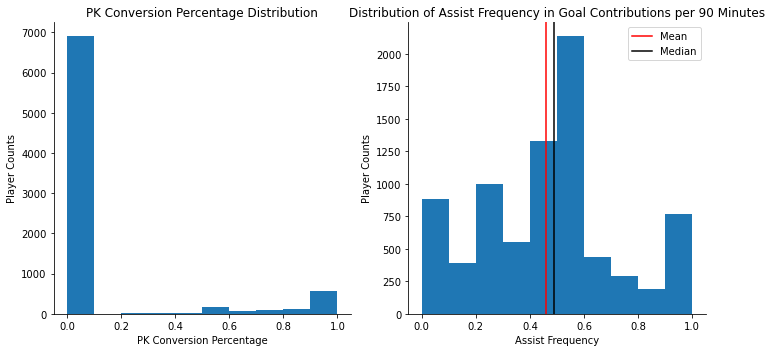

In [95]:
# putting them in a subplot
plt.subplots(1, 2, figsize=(10, 5))

# subplot 1 - pkconvpct
plt.subplot(1, 2, 1)
plt.hist(grouped_stats_df["PKConvPct"])

# labels, title and cleaning
plt.title("PK Conversion Percentage Distribution")
plt.xlabel("PK Conversion Percentage")
plt.ylabel("Player Counts")
sns.despine()

# subplot 2 - ast frequency
plt.subplot(1, 2, 2)
plt.hist(grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"])
plt.axvline(grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"].mean(), color="red", label="Mean")
plt.axvline(grouped_stats_df["Ast_Freq_in_Gl_Contribution_p90"].median(), color="black", label="Median")

# labels, title and cleaning
plt.title("Distribution of Assist Frequency in Goal Contributions per 90 Minutes")
plt.xlabel("Assist Frequency")
plt.ylabel("Player Counts")
plt.legend()
sns.despine()

plt.tight_layout()
plt.show()

Since these two features had a fair amount of `NaN` values that we had to fill ourselves, we do acknowledge the bias we created in these distributions. 

As we can see in `PKConvPct` an overwhelming majority of the players now have a 0% conversion rate on penalty kicks as most had not taken one. This was intentional however as we wanted to further highlight the rarity and importance of having a player who can manage a high `PKConvPct`.

In our second feature - `Ast_Freq_in_Gl_Contribution_p90` we can see major changes occurred. First, since we filled a majority of the dataset's missing values with averages from each position, we significantly altered the distribution of this feature. As a result of us filling the values and performing a `.groupby()` we managed to almost create a left-skewed normal distribution near our mean of approximately .46. This will aid in our clustering as players who assist more (low values for this feature) and players who score more (high values for this feature) will be easier to recognize as the mean value for this feature is near the median.

Now that we've completed our feature engineering, dealt with all our missing values and performed our `.groupby()`. We can save this dataset to a csv and begin our advanced modelling in our next notebook.

In [75]:
# final check before saving
grouped_stats_df

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,2019.50,19.50,2000.0,20.50,11.50,1024.50,2.50,1.00,2.50,0.00,0.00,0.00,0.00,0.22,0.09,0.32,0.22,0.32,1.0,0.00,0.0,0.00,0.0,0.00,0.56,49.47,52.88,0.00,0.28
Aaron-Cresswell,2017.00,27.00,1989.0,32.00,31.29,2772.14,1.14,3.14,1.14,0.00,0.00,3.86,0.29,0.03,0.10,0.13,0.03,0.13,0.0,0.29,0.0,0.00,0.0,0.00,0.97,85.95,103.79,0.00,0.73
Aaron-Hickey,2020.00,18.00,2002.0,11.00,10.00,758.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,1.00,0.91,68.91,42.11,0.00,0.49
Aaron-Hughes,2011.50,31.50,1979.0,23.50,22.50,2033.50,0.25,0.00,0.25,0.00,0.00,0.75,0.00,0.01,0.00,0.01,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.94,85.30,65.46,0.00,0.00
Aaron-Hunt,2013.67,26.67,1986.0,21.56,17.67,1557.78,3.78,2.56,2.56,1.22,1.56,1.56,0.11,0.21,0.12,0.32,0.16,0.27,0.0,1.00,1.0,0.00,0.0,0.00,0.76,67.12,59.57,0.79,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,2016.14,27.14,1989.0,18.29,17.57,1551.29,1.14,0.71,1.14,0.00,0.00,6.57,0.86,0.06,0.04,0.10,0.06,0.10,0.0,0.29,0.0,0.71,0.0,0.29,0.96,84.94,57.07,0.00,0.41
Zouheir-Dhaouadi,2012.00,24.00,1988.0,8.00,1.00,235.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.38,0.0,1.00,0.0,0.00,1.0,0.00,0.12,29.38,9.79,0.00,0.00
Zubi,2013.00,20.00,1993.0,1.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,1.00,0.0,0.00,0.00,6.00,0.30,0.00,0.50


In [74]:
# saving our final dataset to a csv for the next notebook - modelling
grouped_stats_df.to_csv(path_or_buf="FormattedCapstoneData/grouped_stats_df.csv")

# Conclusion

The steps completed in this notebook were as follows:

- Converted categorical `object` columns into numerical columns using OneHotEncoding.
- Concatenated our OHE columns into our dataset.
- Engineered new numerical features out of the numerical features already in our dataset.
- Observed our numerical engineered features' distributions to see if they made intuitive sense in a soccer context.
- Dealt with null values in our engineered features.
- Performed a `.groupby()` on our `Player_Names` to group each player over their entire career.

In summary, the goal of our feature engineering in this notebook was to create metrics that were relative rather than absolute (which prior to this notebook, was a majority of our metrics). By creating relative metrics, we allow for players who may not have the same absolute statlines be comparable to one another through their relative metrics such as `Gls_p90`, and `Avg_Mins_pGame`. With these metrics, the goal is to aid our clustering model in being able to compare, identify, and potentially group players together who share similar metrics despite different situations in their respective league and team.

With these new engineered features, we will continue on to our next notebook ***4. Modelling***.